In [7]:
import pandas as pd
from functools import reduce

In [ ]:
file_path = r'C:\Users\FCJEToshiba\Downloads\RN\Datos_PAT23-006.xlsx'

sheets_to_use = {
    'tCO2e per capita UN': 'tCO2e per capita UN',
    'tCO2e-million $ GDP UN': 'tCO2e-million $ GDP UN',
    'Governance Readiness UND': 'Governance Readiness UND',
    'GDP per capita (current US$)': 'GDP per capita (current US$)',
    'GDP (current US$)': 'GDP (current US$)'
}

country_aliases = {
    'Chile': 'Chile',
    'USA': 'USA',
    'United States': 'USA',
    'Estados Unidos': 'USA',
    'Denmark': 'Denmark',
    'Dinamarca': 'Denmark',
    'Brazil': 'Brazil',
    'Brasil': 'Brazil',
    'China': 'China'
}

dfs = []

for sheet_name, var_name in sheets_to_use.items():
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df[df['Country'].isin(country_aliases.keys())].copy()
    df['Country'] = df['Country'].map(country_aliases)
    df = df[['Country'] + [col for col in df.columns if str(col).isdigit()]]
    df_long = df.melt(id_vars='Country', var_name='Año', value_name=var_name)
    df_long['Año'] = df_long['Año'].astype(int)
    dfs.append(df_long)

final_df = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Año'], how='outer'), dfs)
final_df.sort_values(by=['Country', 'Año'], inplace=True)

output_path = r'C:\Users\FCJEToshiba\Downloads\RN\Dataset_Combinado_Limpio.xlsx'
final_df.to_excel(output_path, index=False)
print(final_df.head())


   Country   Año tCO2e per capita UN tCO2e-million $ GDP UN  \
2   Brazil  2013                6.73                 548.71   
7   Brazil  2014                6.87                 568.76   
12  Brazil  2015                6.74                 767.17   
17  Brazil  2016                7.08                 816.17   
22  Brazil  2017                7.14                    721   

    Governance Readiness UND  GDP per capita (current US$)  GDP (current US$)  
2                   0.488173                  12258.565709       2.472820e+12  
7                   0.474139                  12071.404464       2.456044e+12  
12                  0.446693                   8783.215424       1.802212e+12  
17                  0.443744                   8680.736469       1.795693e+12  
22                  0.431058                   9896.718895       2.063515e+12  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
df = pd.read_excel('Dataset_Combinado_Limpio.xlsx')

print("Primeras filas:")
print(df.head())
print("\nResumen:")
print(df.info())

Primeras filas:
  Country   Año  tCO2e per capita UN  tCO2e-million $ GDP UN  \
0  Brazil  2013                 6.73                  548.71   
1  Brazil  2014                 6.87                  568.76   
2  Brazil  2015                 6.74                  767.17   
3  Brazil  2016                 7.08                  816.17   
4  Brazil  2017                 7.14                  721.00   

   Governance Readiness UND  GDP per capita (current US$)  GDP (current US$)  
0                  0.488173                  12258.565709       2.472820e+12  
1                  0.474139                  12071.404464       2.456044e+12  
2                  0.446693                   8783.215424       1.802212e+12  
3                  0.443744                   8680.736469       1.795693e+12  
4                  0.431058                   9896.718895       2.063515e+12  

Resumen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column  

In [ ]:
df.dropna(axis=1, how='all', inplace=True)
print("\nValores nulos por columna:")
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')
df['Country'] = df['Country'].astype(str)
print("\nPaíses disponibles:", df['Country'].unique())



Valores nulos por columna:
Country                         0
Año                             0
tCO2e per capita UN             0
tCO2e-million $ GDP UN          0
Governance Readiness UND        0
GDP per capita (current US$)    0
GDP (current US$)               0
dtype: int64

Países disponibles: ['Brazil' 'Chile' 'China' 'Denmark' 'USA']


In [ ]:
variables = df.columns.drop(['Country', 'Año'])

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[variables] = scaler.fit_transform(df_scaled[variables])

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

variables = [
    'tCO2e per capita UN',
    'tCO2e-million $ GDP UN',
    'Governance Readiness UND',
    'GDP per capita (current US$)',
    'GDP (current US$)'
]

for var in variables:
    fig = px.line(df, x='Año', y=var, color='Country', title=f'{var} por Año')
    fig.show()


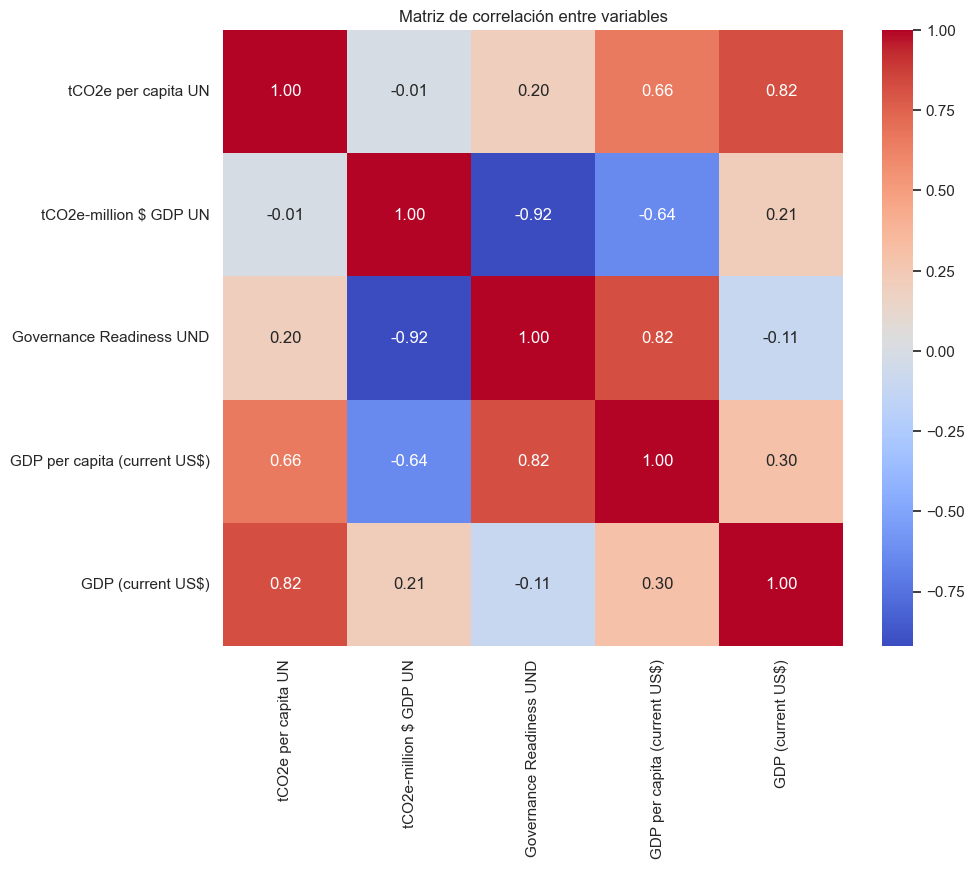

In [ ]:
correlation_matrix = df[variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación entre variables")
plt.show()

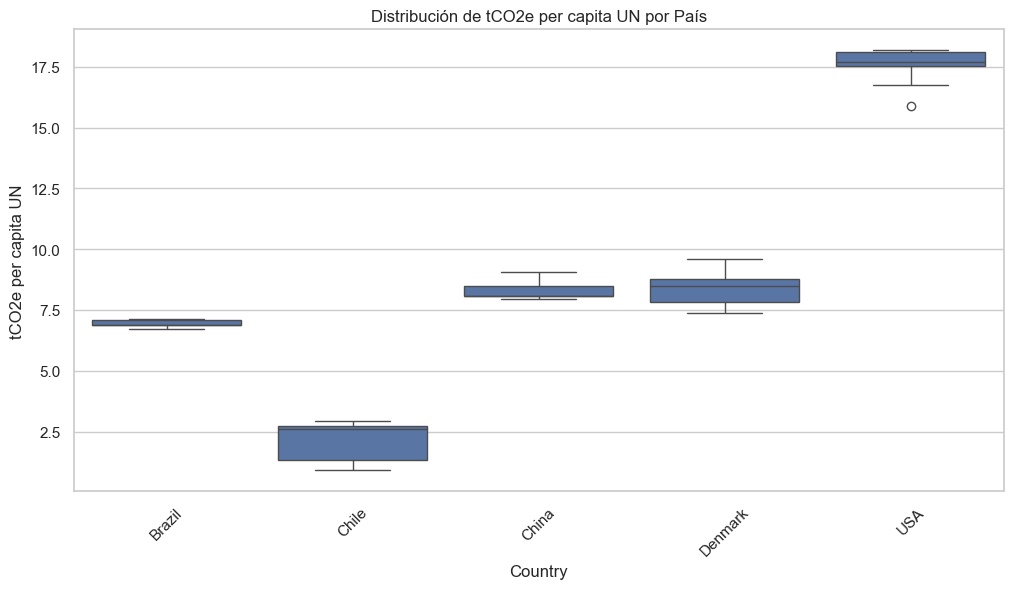

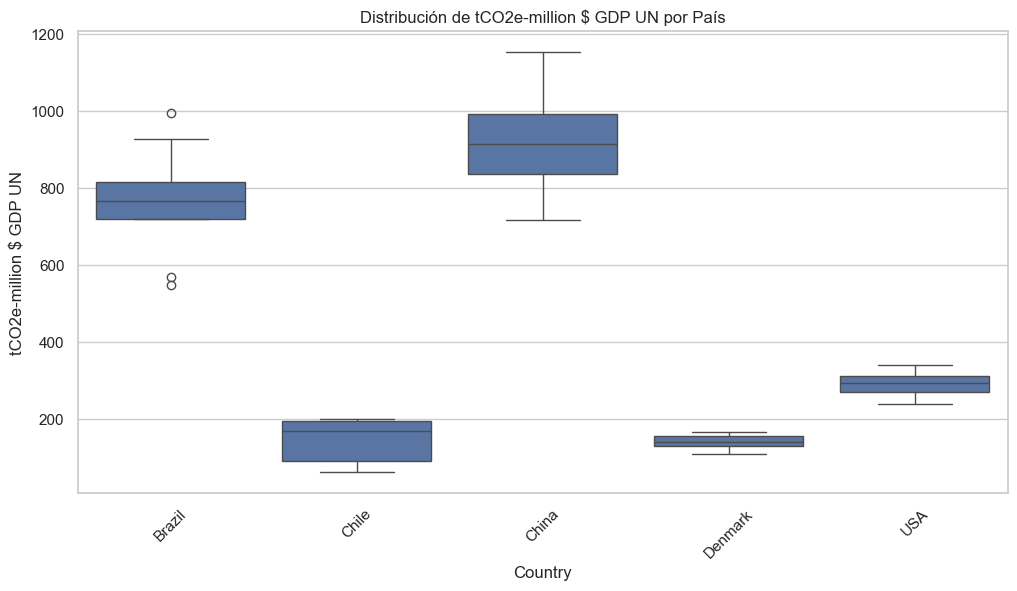

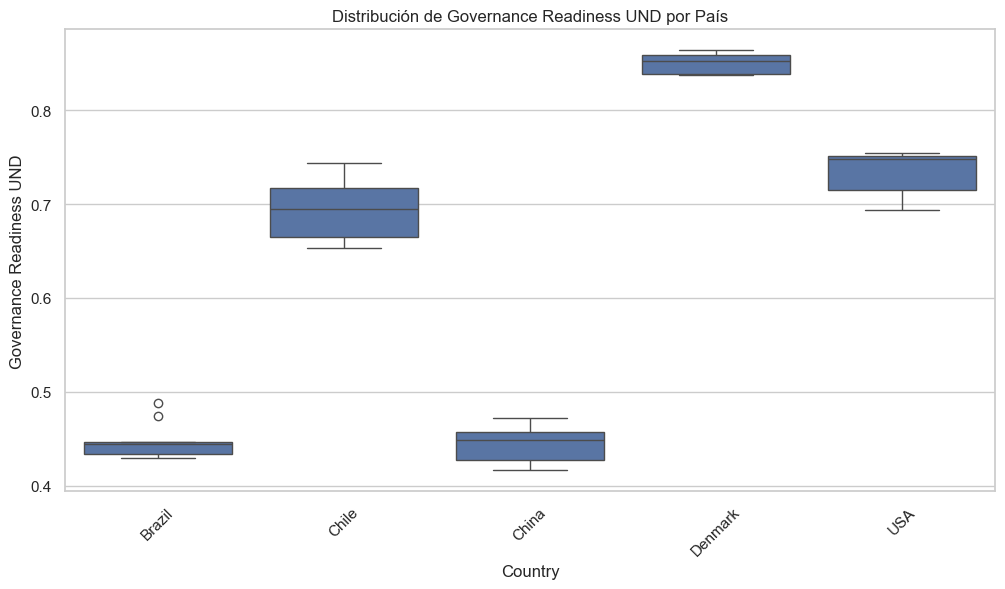

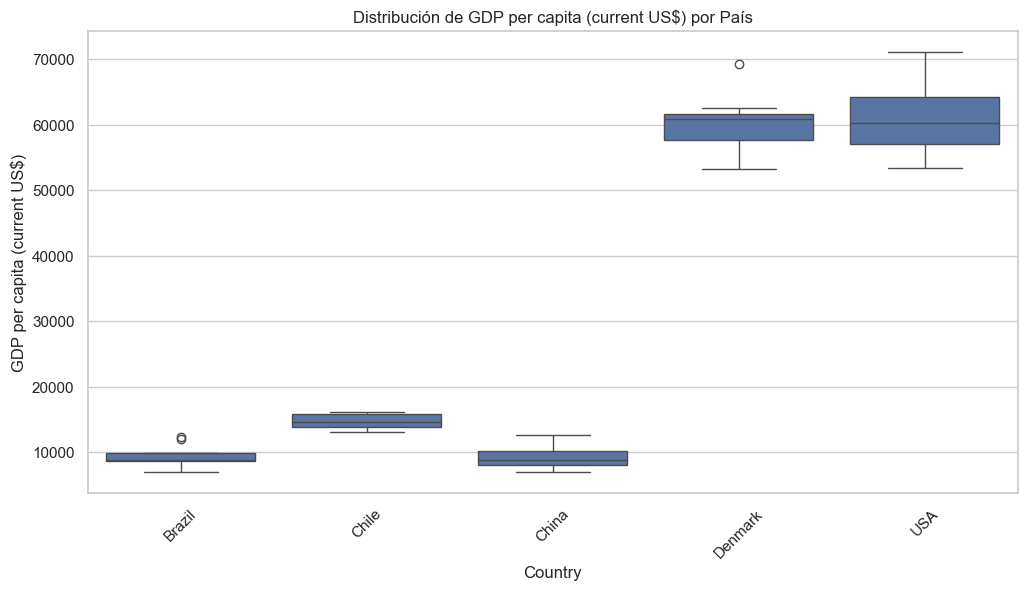

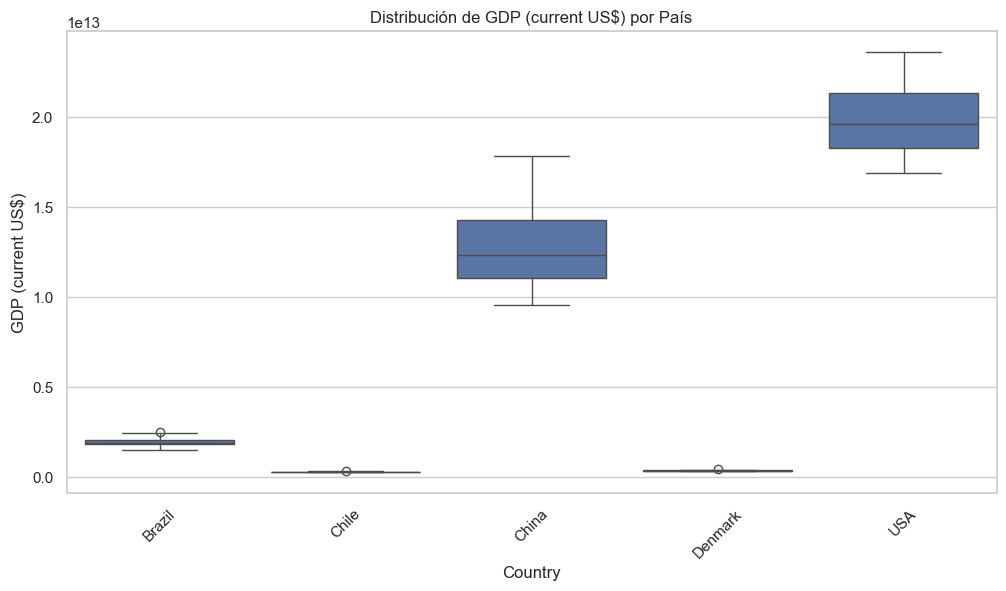

In [ ]:
for var in variables:
    plt.figure()
    sns.boxplot(x='Country', y=var, data=df)
    plt.title(f'Distribución de {var} por País')
    plt.xticks(rotation=45)
    plt.show()

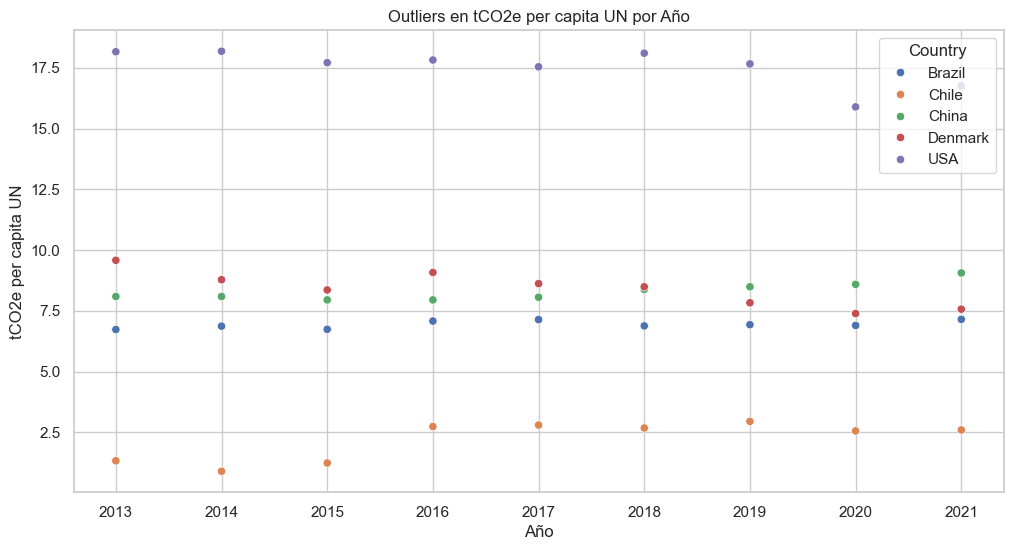

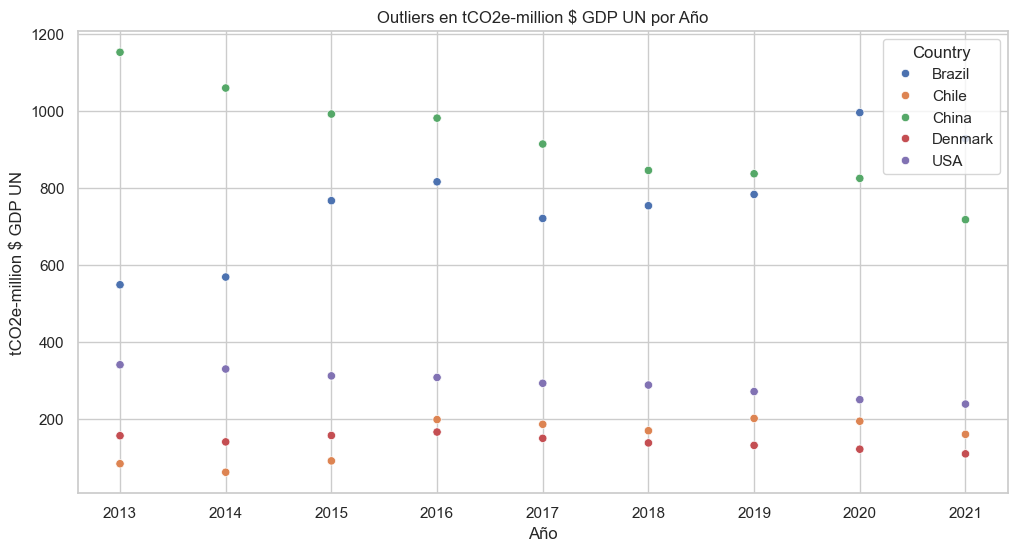

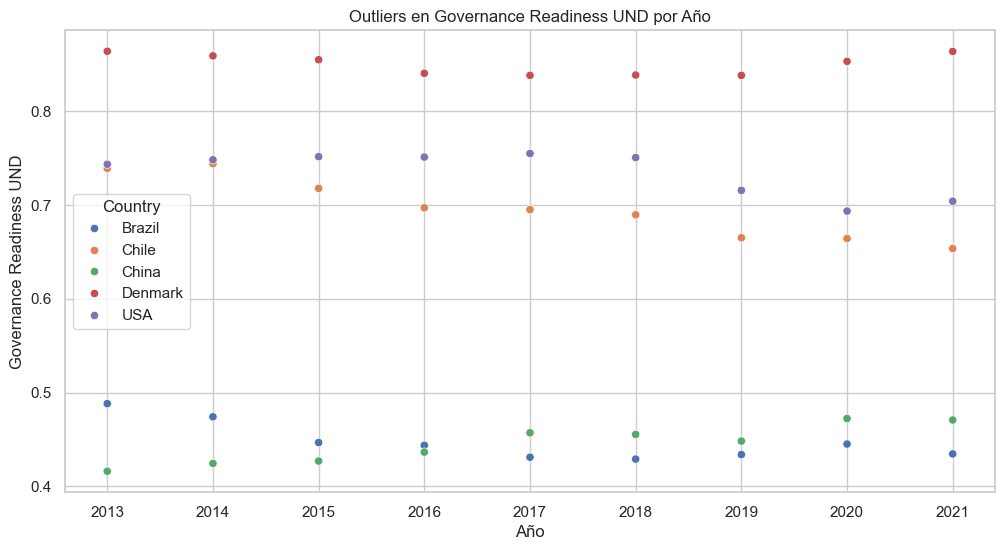

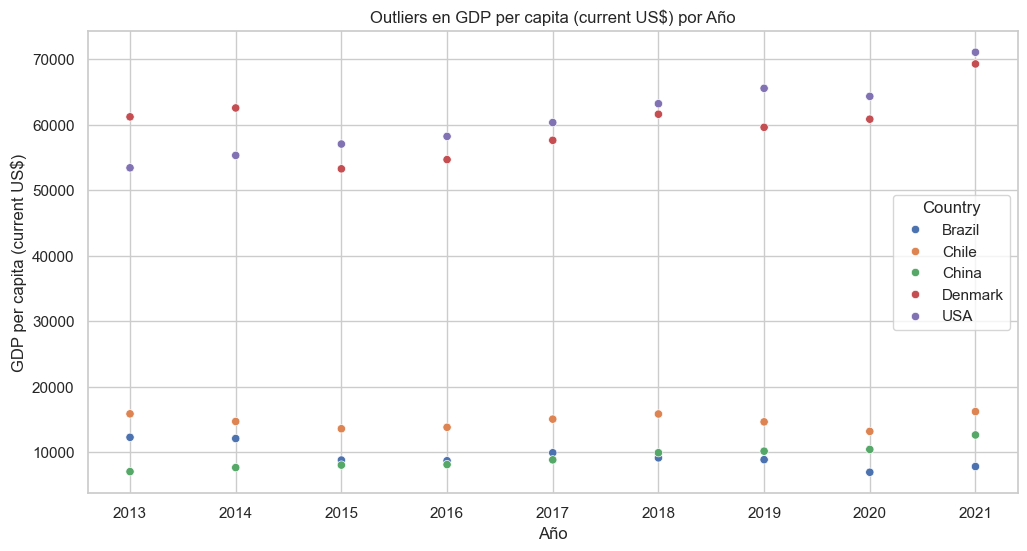

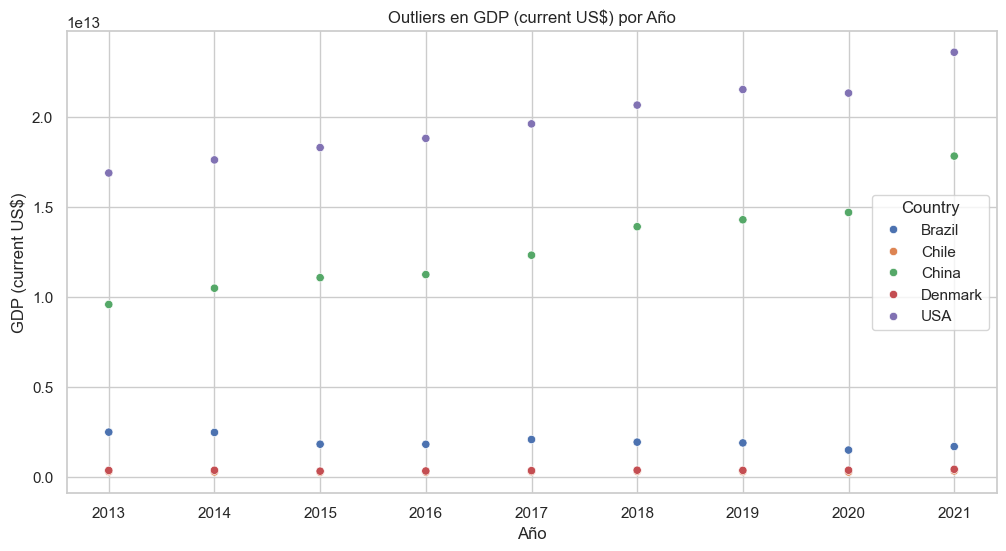

In [ ]:
for var in variables:
    plt.figure()
    sns.scatterplot(data=df, x='Año', y=var, hue='Country')
    plt.title(f'Outliers en {var} por Año')
    plt.show()


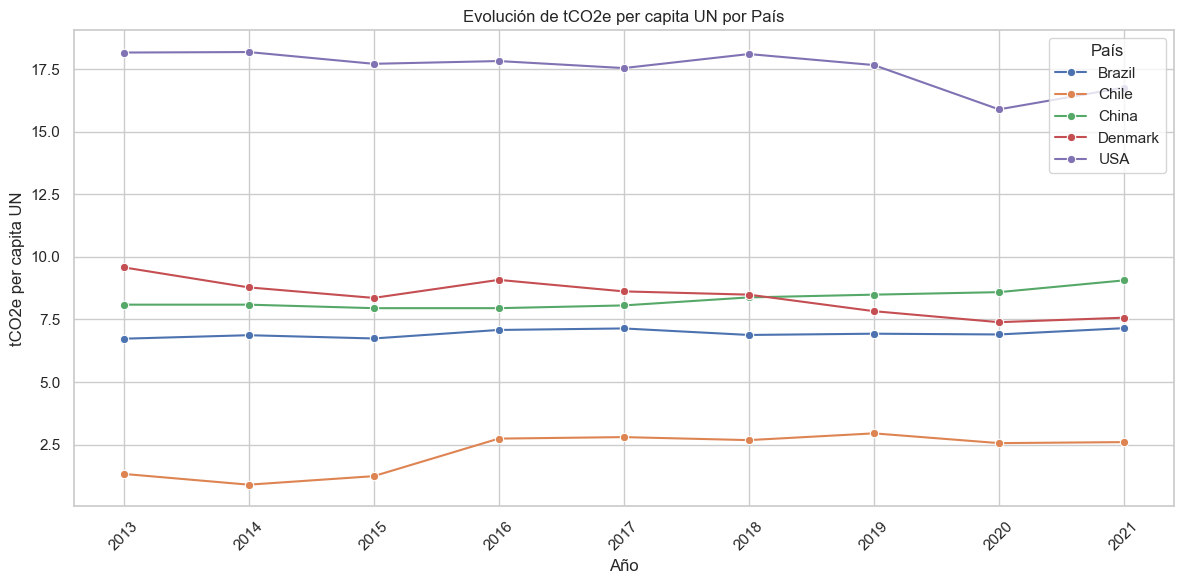

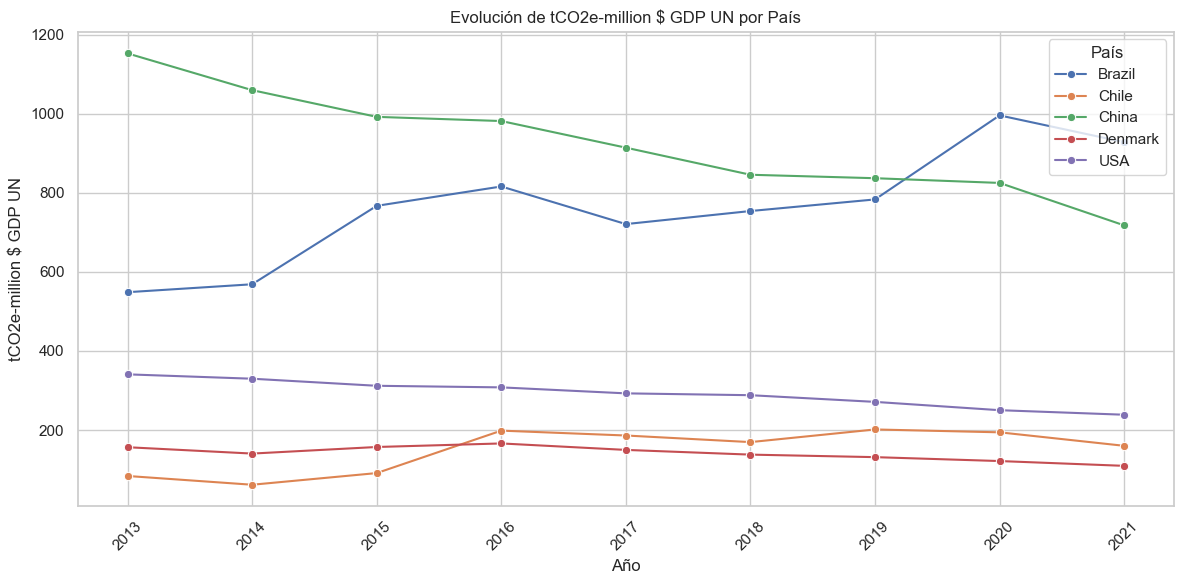

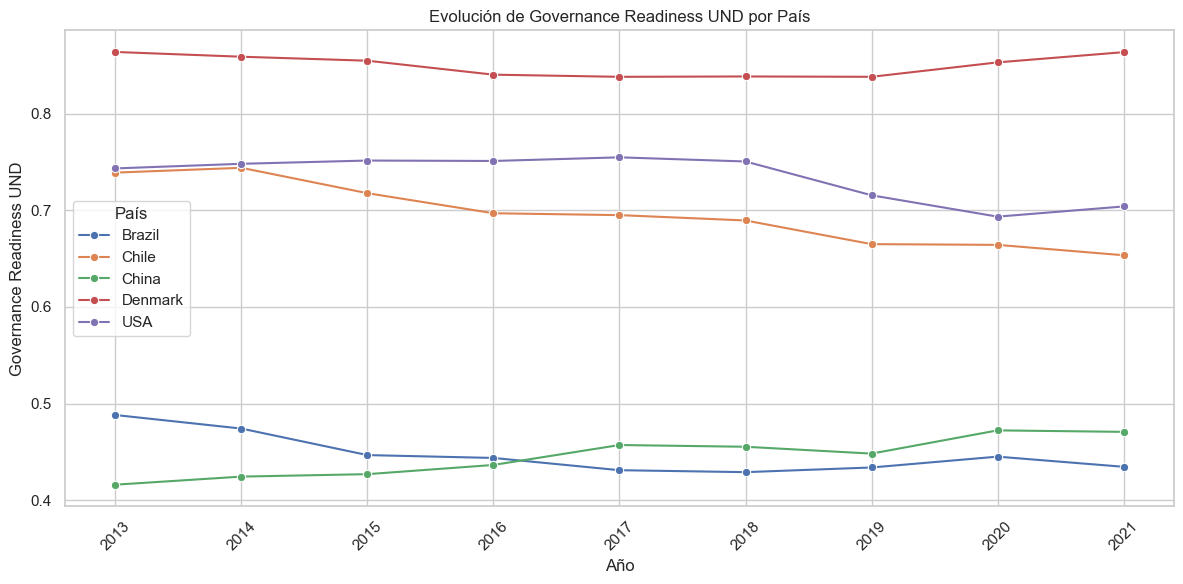

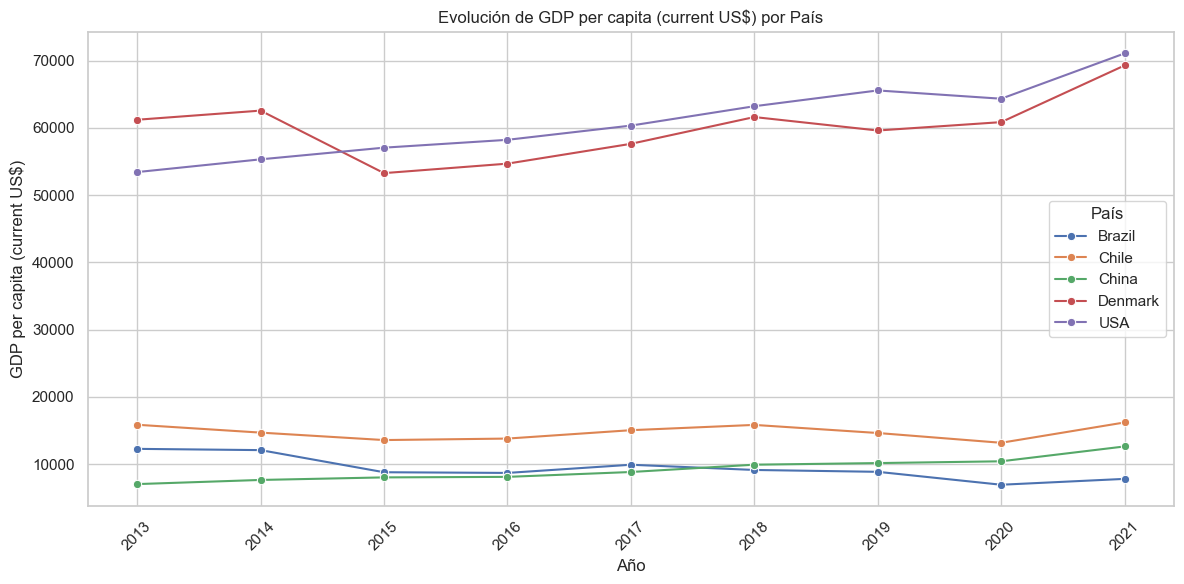

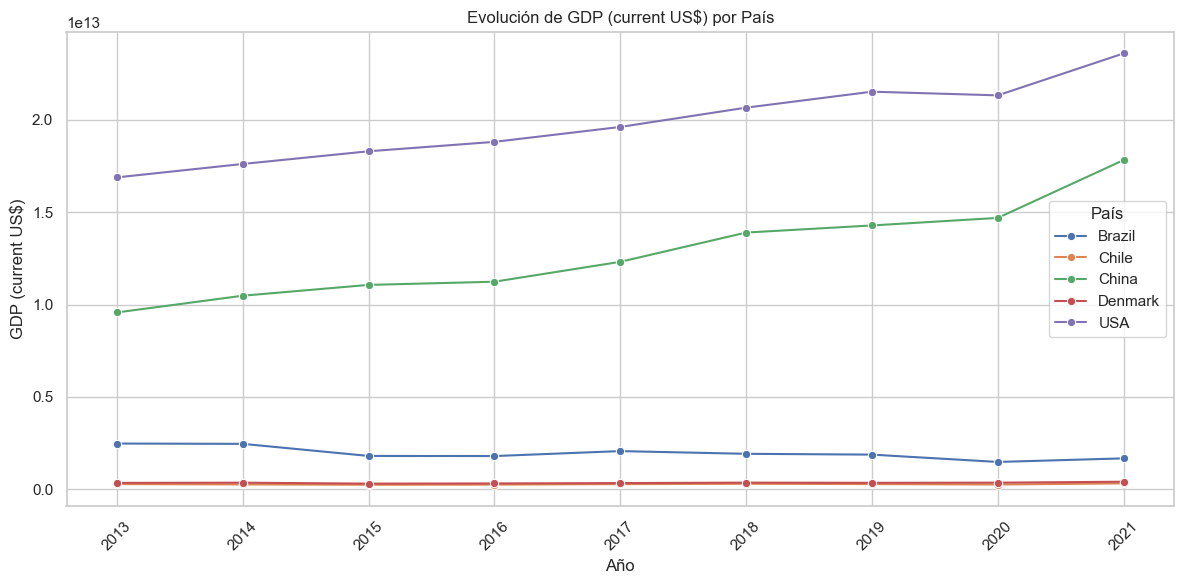

In [ ]:
for var in variables:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Año', y=var, hue='Country', marker='o')
    plt.title(f'Evolución de {var} por País')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='País')
    plt.tight_layout()
    plt.show()


In [ ]:
df_mean_by_country = df.groupby('Country')[variables].mean().reset_index()

for var in variables:
    fig = px.bar(df_mean_by_country, x='Country', y=var, title=f'Promedio de {var} por País')
    fig.show()

In [ ]:
import plotly.subplots as sp

for country in df['Country'].unique():
    df_c = df[df['Country'] == country]
    fig = sp.make_subplots(rows=len(variables), cols=1, shared_xaxes=True, vertical_spacing=0.02,
                           subplot_titles=[f'{var}' for var in variables])
    for i, var in enumerate(variables):
        fig.add_trace(px.line(df_c, x='Año', y=var).data[0], row=i+1, col=1)
    fig.update_layout(height=300*len(variables), title_text=f'Panel de Variables para {country}')
    fig.show()